### Problem Statement 
It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variables.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

### Hypothesis generation 
This involves understaning the problem in details by brainstormingg as many factors as possible, which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data. 

Below are some of the factors which I think can affect the Loan Approval( dependent variable for this loan prediction problem):
- **Marital Status:** Married applicants are more likely to be approved due to dual-income households or perceived stability.
- **Income:** Applicants with higher incomes are more likely to be approved, as they demonstrate stronger repayment capacity.
- **Marital Status:** Married applicants are more likely to be approved due to dual-income households or perceived stability.
- **Loan Term:** Short-term loans (e.g., <5 years) are approved more often than long-term loans.
- **Loan Amount:** Larger loan amounts relative to income decrease approval likelihood due to higher risk.
- **Dependents:** Applicants with fewer dependents are more likely to be approved, as more dependents may strain finances.
- **Past Defaults:** Applicants with no history of loan defaults are more likely to be approved.

### Loading the data

In [8]:
#let's import the necessary libraries 
import pandas as pd #for data manipulation
import numpy as np  #for mathematical calculations 
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for plotting graphs
%matplotlib inline
import warnings #to ignore any warnings
warnings.filterwarnings('ignore')

In [14]:
#let's import the datasets
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [16]:
#we'll view the first 5 rows of the train datasets 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
#let's print dtypes for each variables 
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see three formats of data types: 
- **Object:** Object format means variables are categorical.
- **int64:** It represents the integral variables.
- **float64:** It represents the variables which have some decimal values involved. They are also numerical variables.

In [34]:
#let's view the shape of the train datasets
train_df.shape

(614, 13)

In [36]:
#let's view the shape of the test datasets 
test_df.shape

(367, 12)

In [44]:
#let's drop 'Loan_ID' column from the datasets
train_df=train_df.drop(columns=['Loan_ID'], axis=1)

In [50]:
#let's do the same for the test datasets 
test_df=test_df.drop(columns=['Loan_ID'], axis=1)

In [273]:
#let's check for info 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Dependents               614 non-null    object 
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    bool   
 11  Property_Area_Urban      614 non-null    bool   
 12  Gender_1                 614 non-null    bool   
dtypes: bool(3), float64(4), int64(5), object(1)
memory usage: 49.9+ KB


In [275]:
#let's check for missing values
train_df.isna().sum()

Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_1                   0
dtype: int64

### Exploratory Data Analysis
**Univariate Analysis**
   This is the simplest form of analyzing data, where we examine each variable individually. For categorical features, we can use frequency table or bar plot, which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

Target variable: we'll look at the target variable, i.e. Loan_Status. As it is a categorical variable, let's view its frequency table, percentage distribution of the variable.

In [78]:
#Frequecncy table of the variable will give us the count of each category in that varaible.
train_df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [82]:
#normalize can be set to True to print proportions, instead of numbers.
train_df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

the loan of 442(of around 69%) people out 614 was approved.

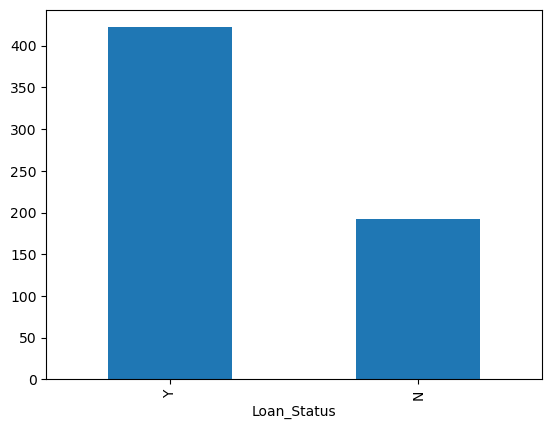

In [95]:
train_df['Loan_Status'].value_counts().plot(kind='bar', xlabel='Loan_Status')
plt.show()

let's visualize each variable separately. Different types of variables are categorical, ordinal and numerical. 

- **categorical features:** these features are categorical (Gender, Married, Self_Employed, Credit_History, Loan_Status).   
- **ordinal features:** variables in categoorical features having some order involved (Dependents, Education, Property_Area). 
- **numerical features:** these are features that have numeriacal values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term). 

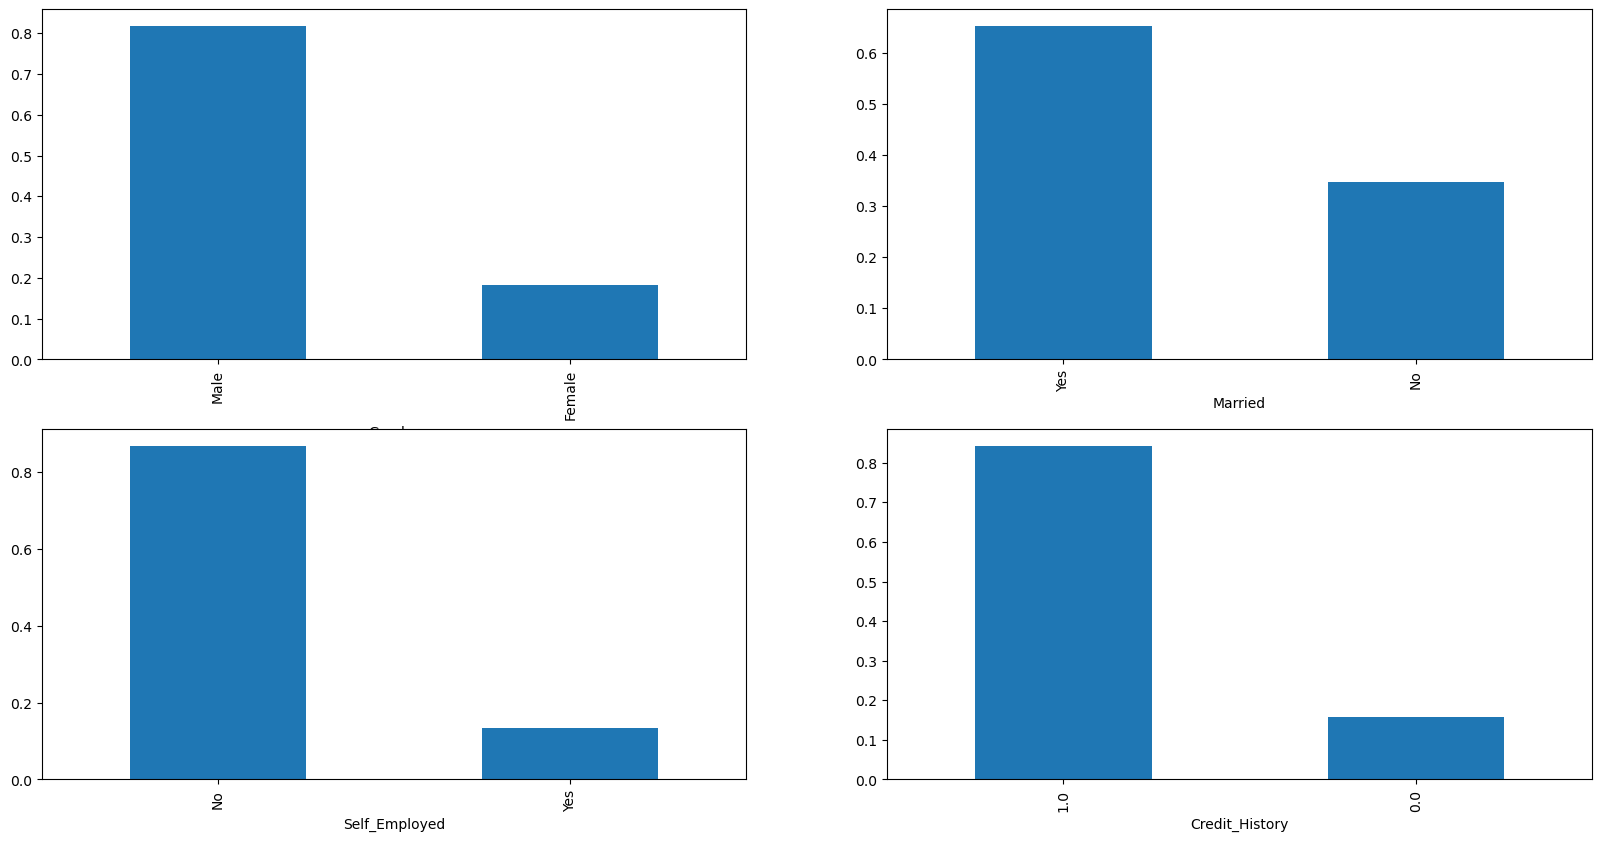

In [100]:
#let's visualize the categorical and ordinal features, first. 
#INDEPENDENT VARIABLES (CATEGORICAL)
plt.figure(1) 
plt.subplot(221)
train_df['Gender'].value_counts(normalize=True).plot(figsize=(20,10), kind='bar', xlabel='Gender')

plt.subplot(222)
train_df['Married'].value_counts(normalize=True).plot(kind='bar', xlabel='Married')

plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize=True).plot(kind='bar', xlabel='Self_Employed')

plt.subplot(224)
train_df['Credit_History'].value_counts(normalize=True).plot(kind='bar', xlabel='Credit_History')
plt.show()

Based on the information above: 
- 80% applicants of the applicants are male. 
- around 65% applicants in the dataset are married.
- around 15% applicants in the dataset are self-employed.
- around 85% applicants have repaid their debts.

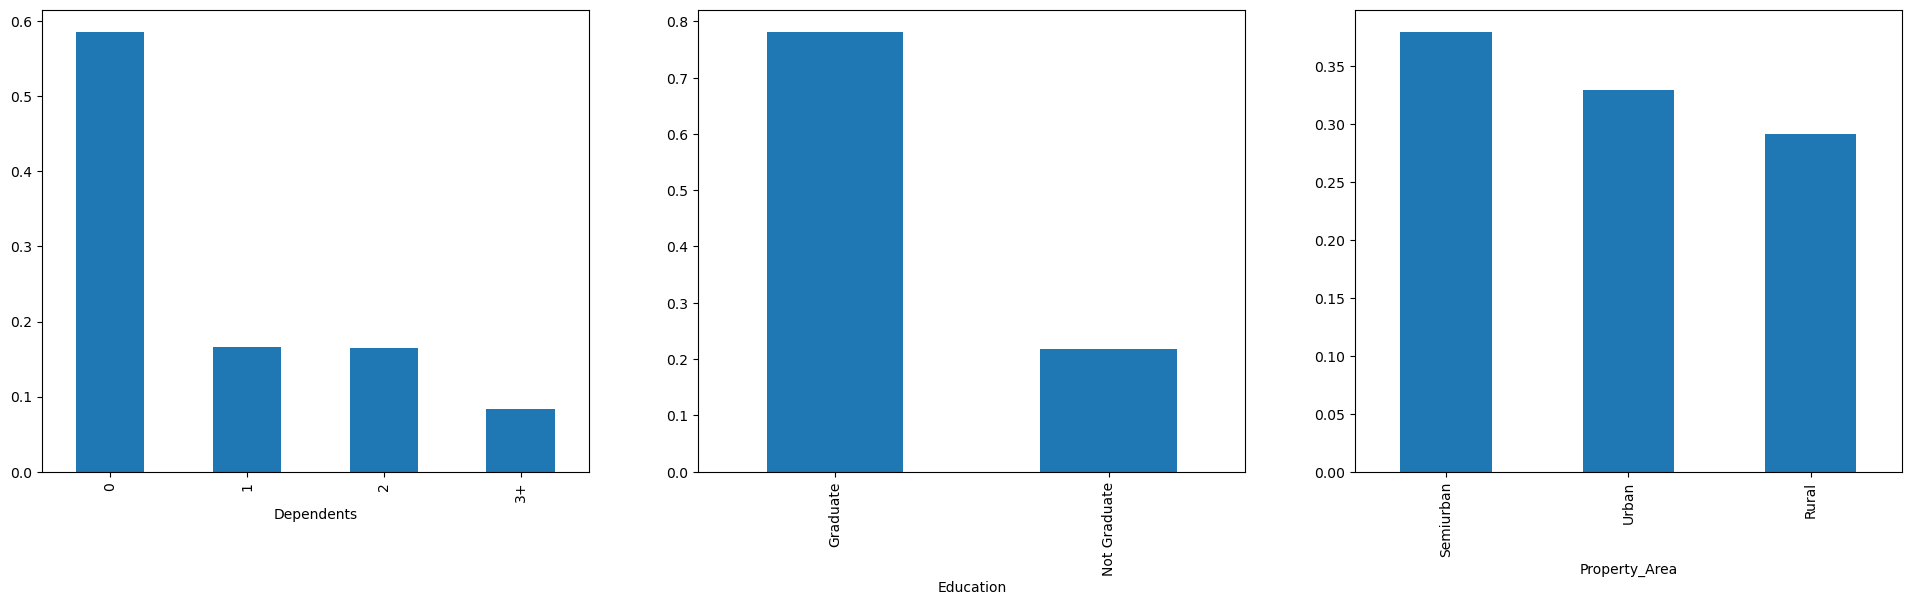

In [103]:
#let's visualize the ordinal variables 
#INDEPENDENT VARIABLES (ORDINALS)
plt.figure(1) 
plt.subplot(131)
train_df['Dependents'].value_counts(normalize=True).plot(figsize=(24,6), kind='bar', xlabel='Dependents')

plt.subplot(132)
train_df['Education'].value_counts(normalize=True).plot(kind='bar', xlabel='Education')

plt.subplot(133)
train_df['Property_Area'].value_counts(normalize=True).plot(kind='bar', xlabel='Property_Area')
plt.show()

from these, we can conclude: 
- most of the applicants don't have dependents.
- most of the applicants are from semiurban.
- around 80% of the applicants are graduates.

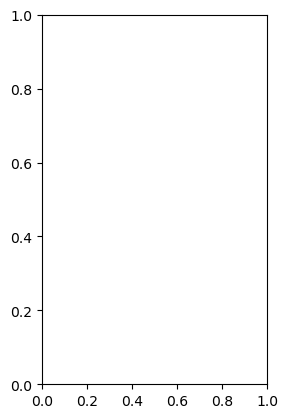

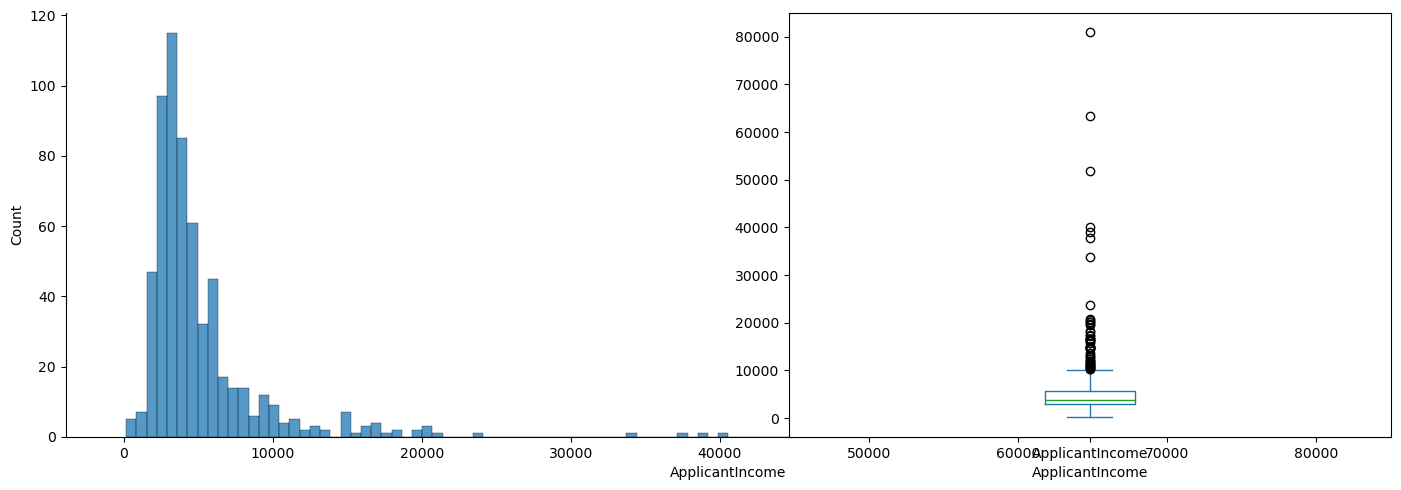

In [115]:
#INDEPENDENT VARIABLES (NUMERICAL)
#let's view the distribution of Applicant income first 
plt.figure(1)
plt.subplot(121)
sns.displot(train_df['ApplicantIncome'])

plt.subplot(122)
train_df['ApplicantIncome'].plot(kind='box', figsize=(16,5), xlabel='ApplicantIncome')
plt.show()

- this suggests that most of the data in the distribution of the applicants' income is skewed towards the left, which means it is not normally distributed.
- the boxplot confirms the presence of a lot of outliers or extreme values. This can be attributed to the income disparity in the society. Part of which can be driven by the fact that we are looking at people with different education levels.

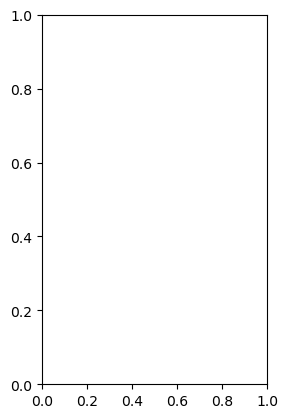

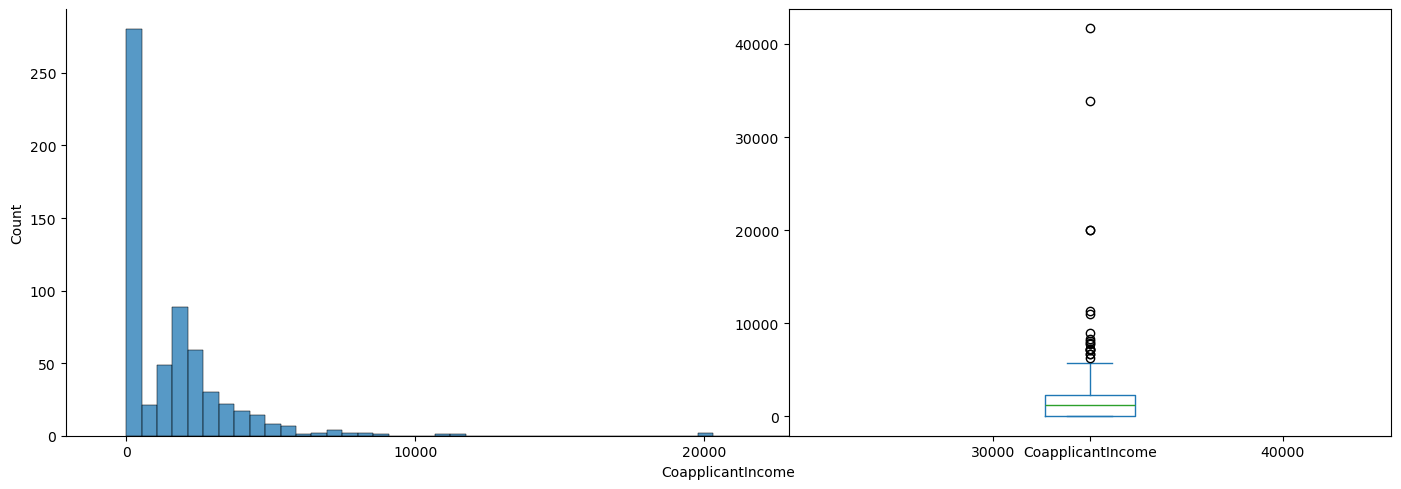

In [120]:
#let's look at the Coapplicant income distribution
plt.figure(1)
plt.subplot(121)
sns.displot(train_df['CoapplicantIncome'])

plt.subplot(122)
train_df['CoapplicantIncome'].plot(kind='box', figsize=(16,5))
plt.show()

we see a similar distination as that of the applicant income. we also see a lot of outliers in thr coapplicant income and it is not normally distributed.

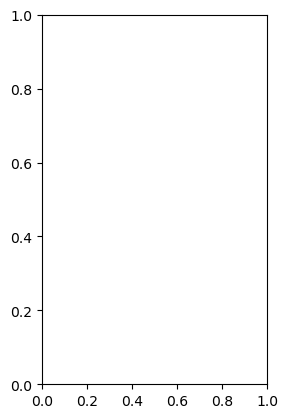

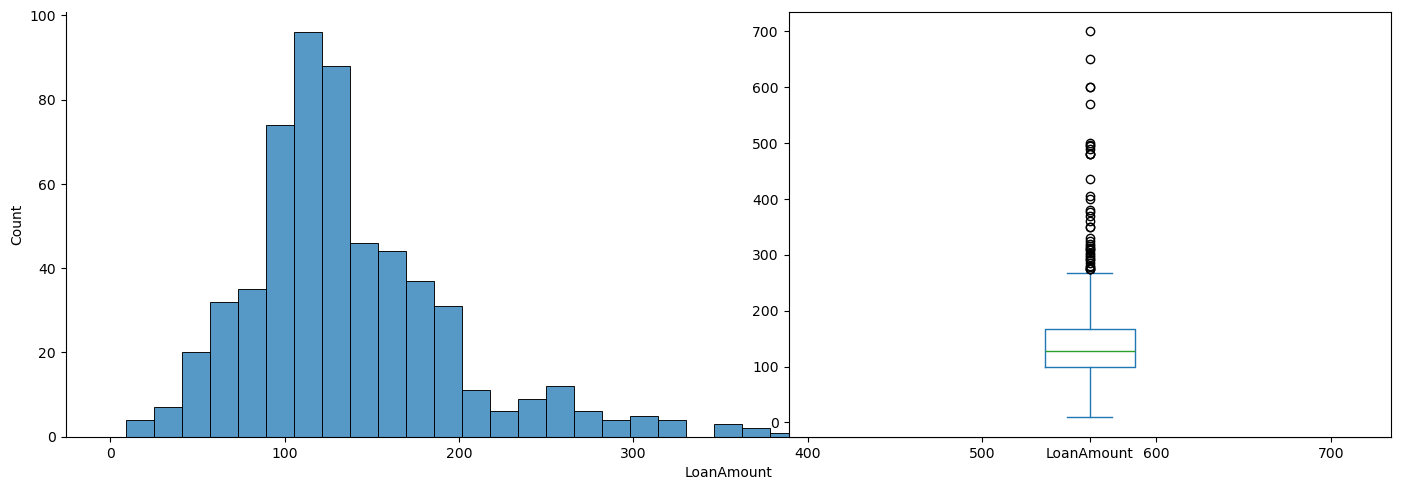

In [123]:
#let's look at the distribution of LoanAmout variable. 
plt.figure(1)
plt.subplot(121)
sns.displot(train_df['LoanAmount'])

plt.subplot(122)
train_df['LoanAmount'].plot(kind='box', figsize=(16,5))
plt.show()


we see a lot of outliers in this variable and the distribution is fairly normal.

we'd like to know how well each features correlate with Loan Status.

### Bivariate Analysis 
- let's recall some of the hypothesis that we generated earlier,i.e. Applicants with higher incomes are more likely to be approved, as they demonstrate stronger repayment capacity.
- Let's try to test the above metioned hypothesis using bivariate analysis. we will now explore individual variable with respect to the target variable.

1. Categorical independent variable vs Target variable

   Firstly, we'll find the relation between target variable and categorical independent variables. let us look at the stacked bar plot, which will give us the proportion of approved and unapproved loans.

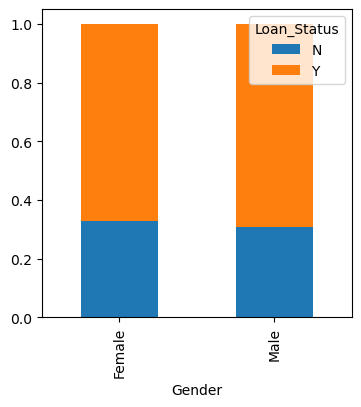

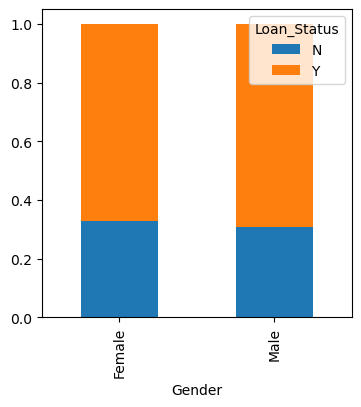

In [130]:
#let's visulize for Gender 
Gender=pd.crosstab(train_df['Gender'], train_df['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- as evident from the above, that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

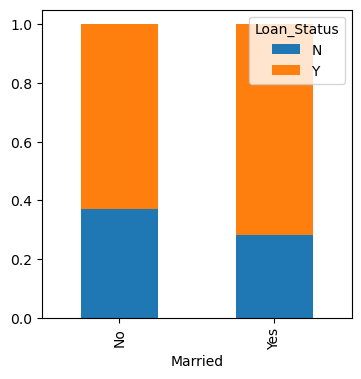

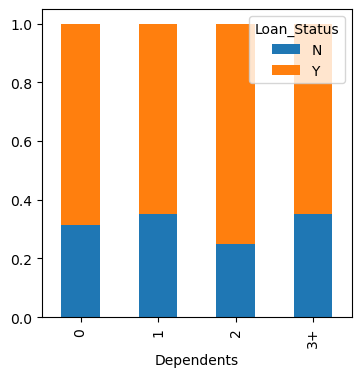

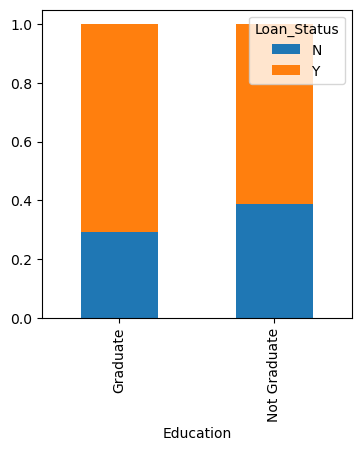

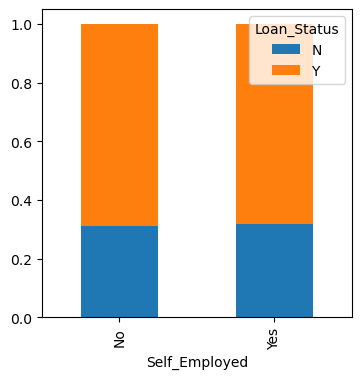

In [137]:
#let's visualize the remaining categorical variables vs target variable
Married=pd.crosstab(train_df['Married'], train_df['Loan_Status'])
Dependents=pd.crosstab(train_df['Dependents'], train_df['Loan_Status'])
Education=pd.crosstab(train_df['Education'], train_df['Loan_Status'])
Self_Employed=pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- proportion of married applicants is higher for the approved loans.
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- there is nothing significant we can deduce from Self_Employed Vs Loan_Status plot.

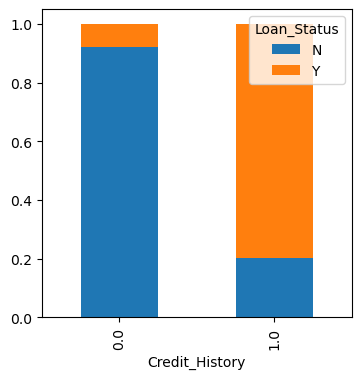

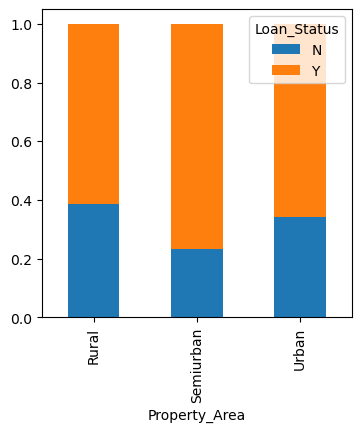

In [140]:
#let's check the relationship between remaining categorical independent variables and Loan_Status 
Credit_History=pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
Property_Area=pd.crosstab(train_df['Property_Area'], train_df['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- it seems people with credit history as 1 are more likely to get their loans approved.
- proportion of loans getting in semiurban area is higher as compared to their in rural or urban area.

Now, let's visualize numerical independent variables with respect to the target variable.

### Numerical independent variable vs target variable

we'll try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

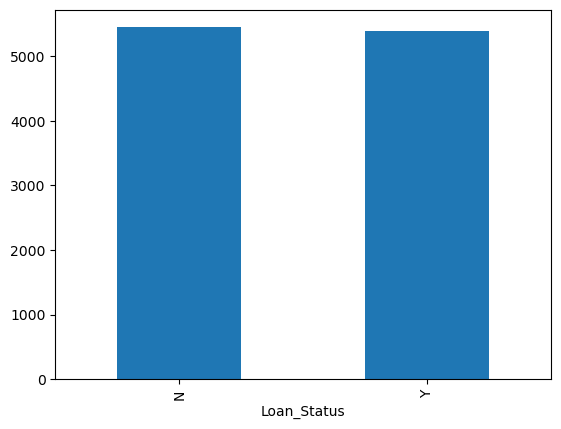

In [146]:
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

- here the y-axis represents the mean applicant income. we don't see any change in the mean income. so let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

## Making Bins
- Alright, imagine you have a big box of different colored candies—red, blue, green, and yellow. If I asked you, "What’s the average sweetness of *all* the candies mixed together?" you might say, "Hmm, they’re all kinda the same sweetness." But what if we sort them into separate bowls by color first? Then, you might notice that the red candies are super sweet, the blue ones are a little sour, and the green ones are just right. By grouping them, you see differences you couldn’t spot when they were all mixed up.
- That’s what "making bins" means here. Instead of looking at *all* the people’s incomes at once (which makes the average seem flat), we’ll sort them into groups (like "low income," "medium income," "high income"). Then, we’ll check if people in one group (like "high income") get approved for loans more often than others. It’s like using smaller bowls to see the real story hiding in the big candy box.

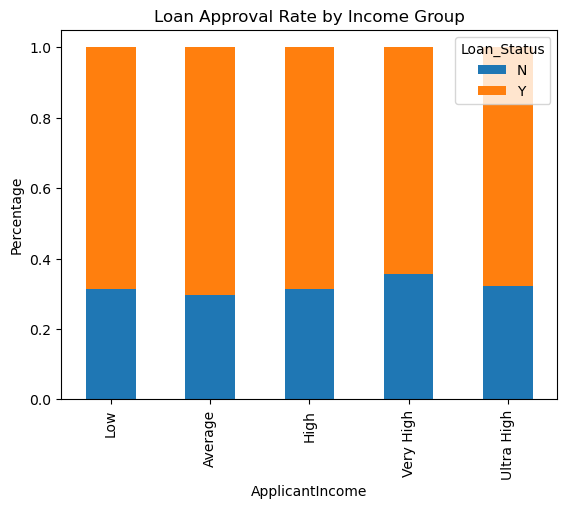

In [171]:
# Define bins and labels (with 5th bin for values >8100)
bins = [0, 2500, 4000, 6000, 8100, np.inf]
group = ['Low', 'Average', 'High', 'Very High', 'Ultra High']

# Bin the data (handle NaN)
train_df['Income_bin'] = pd.cut(
    train_df['ApplicantIncome'], 
    bins=bins, 
    labels=group,
    include_lowest=True,
    ordered=False
)

# Create a normalized crosstab
Income_bin = pd.crosstab(train_df['Income_bin'], train_df['Loan_Status'], normalize='index')
Income_bin.plot(kind='bar', stacked=True)

# Label the plot
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Income Group')
plt.show()

- as evident from above, applicant income does not affect the chances of loan approval, which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

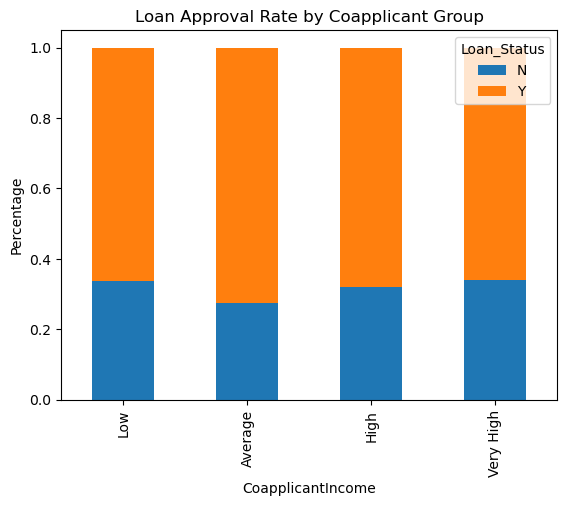

In [182]:
#let's analyze the coapplicant income and loan status variable in similar manner
# Define bins and labels (with 4th bin for values >4200)
bins = [0, 1000, 3000, 4200, np.inf]
group = ['Low', 'Average', 'High', 'Very High']

# Bin the data (handle NaN)
train_df['CoapplicantIncome_bin'] = pd.cut(
    train_df['CoapplicantIncome'], 
    bins=bins, 
    labels=group,
    include_lowest=True,
    ordered=False
)

# Create a normalized crosstab
Income_bin = pd.crosstab(train_df['CoapplicantIncome_bin'], train_df['Loan_Status'], normalize='index')
Income_bin.plot(kind='bar', stacked=True)

# Label the plot
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Coapplicant Group')
plt.show()

- it shows that if coapplicants' income is less, the chances of loan approval are high, but this doesn't look right. The possible reason behind this may be that most of the applicants don't have any coapplicant, so the coapplicant income for such applicant is 0 and hence the loan approval is not dependent on it.

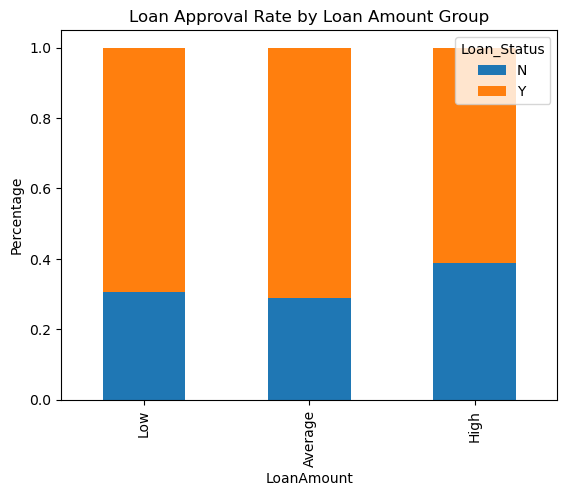

In [185]:
#let's analyze the loan amount variable in similar manner
# Define bins and labels (with 4th bin for values >4200)
bins = [0, 100, 200, 700, np.inf]
group = ['Low', 'Average', 'High', 'Very High']

# Bin the data (handle NaN)
train_df['LoanAmount_bin'] = pd.cut(
    train_df['LoanAmount'], 
    bins=bins, 
    labels=group,
    include_lowest=True,
    ordered=False
)

# Create a normalized crosstab
Income_bin = pd.crosstab(train_df['LoanAmount_bin'], train_df['Loan_Status'], normalize='index')
Income_bin.plot(kind='bar', stacked=True)

# Label the plot
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Loan Amount Group')
plt.show()

- it can be seen that the proportion loans is higher for low and average loan amount as compared to that of high loan amount, which supports our hypothesis, in which we considered that the chances of loan approval will be high when the loan amount is less.

we'll drop the bins which we created for the exploration part. we'll change the 3+ in dependent variable to 3 to make it a numerical variable. we'll also convert the target variables categories into 1 and 0, so that we can find it's correlation with numerical variables. one more reason to do so, is few models like Logistic Regression takes only numerical values as input, we'll replace N with 0 and Y with 1.

In [212]:
print(train_df.columns.tolist())

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [234]:
train_df['Dependents'].replace('3+', 3,inplace= True)
test_df['Dependents'].replace('3+', 3, inplace=True)
train_df['Loan_Status'].replace({'N':0, 'Y':1}, inplace=True)

In [248]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Convert Categorical Columns to Numerical

In [242]:
#we'll do the same for gender 
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform
train_df['Gender'] = le.fit_transform(train_df['Gender'])
test_df['Gender'] = le.fit_transform(test_df['Gender'])

In [250]:
# Encode binary categorical columns (e.g., Yes/No to 1/0)
binary_columns = ['Married', 'Education', 'Self_Employed', 'Loan_Status']
train_df[binary_columns] = train_df[binary_columns].replace({'Yes': 1, 'No': 0, 'Graduate': 1, 'Not Graduate': 0})

# Encode multi-category columns (e.g., Property_Area)
train_df = pd.get_dummies(train_df, columns=['Property_Area', 'Gender'], drop_first=True)

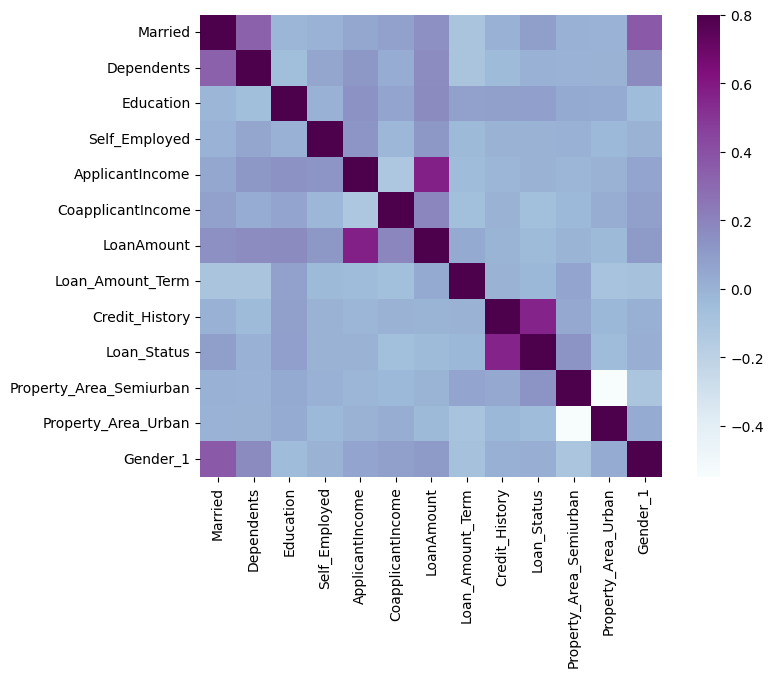

In [252]:
#now we'll look at the correletion between all the numerical variables. we'll use the heat map to visualize the correelation.
#heat maps visualize data through variations in coloring.

# Calculate correlation matrix
matrix = train_df.corr()  #Fixed: No extra characters

# Create a heatmap
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu', ax=ax)
plt.show()

- we'll see that the most correlated variables are (ApplicantIncome to LoanAmount) and (Credit_History to Loan_Status). 

## Missing values and Outliers treatment

In [265]:
#next, we'll check for missing values
train_df.isna().sum()

Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_1                   0
dtype: int64

we will treat the missing values in all the features one after the other.
we can consider these methods to fill the missing values: 
- **for numerical variables:** imputation using mean or median. 
- **for categorical variables:** imputation using mode. 

In [311]:
#categorical_cols = train_df.select_dtypes(include=['object']).columns
#testcategorical_cols = test_df.select_dtypes(include=['object']).columns



#train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])
#test_df[testcategorical_cols] = test_df[testcategorical_cols].fillna(test_df[testcategorical_cols].mode().iloc[0])

#train_df.isnull().sum()

- as it is numerical variables, we can use mean or meadian to impute the missing values. we'll use median to fill the null values, as earlier we saw that LoanAmount have outliers/ not normally distributed, so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [313]:
#numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

#train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
#test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].median())

#train_df.isnull().sum()

### Outliers treatment 
as we saw earlier in univariate analysis, LoanAmount contains outliers, so we have to treat them as the presence of outliers affects the distribution of the data. due to these outliers, bulk of data in the loan amount is at the left and right tail longer, this is called right skewed. one way to remove the skewness is by doing the log transformation. as we take the log transformation, it does not affect the smaller values much, but reduces the larger values. so wwe get a distrribution similiar to the normal distribution.

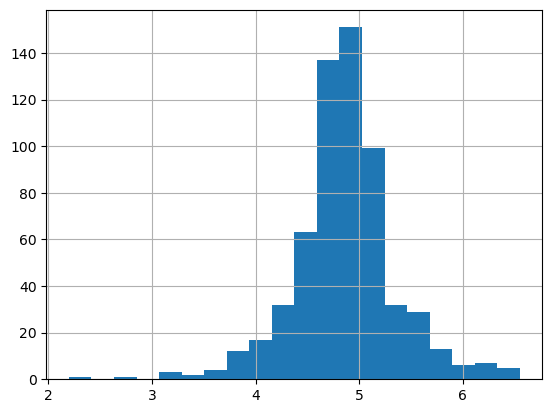

In [286]:
#let's visualize the effect of log transformation. we'll do the similar changes to the test file simoultaneously. 
train_df['LoanAmount_log']=np.log(train_df['LoanAmount'])

test_df['LoanAmount_log']=np.log(test_df['LoanAmount'])

train_df['LoanAmount_log'].hist(bins=20)
plt.show()

- the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a Logistic Regression model and make predictions for the test dataset.

In [341]:
train_df.columns

Index(['Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender_1', 'LoanAmount_log', 'Dependents_1', 'Dependents_2',
       'Dependents_3'],
      dtype='object')

In [343]:
train_df.dtypes

Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Semiurban      int32
Property_Area_Urban          int32
Gender_1                     int32
LoanAmount_log             float64
Dependents_1                 int32
Dependents_2                 int32
Dependents_3                 int32
dtype: object

### Model building 

In [346]:
#sklearn requires the target variable in a separates dataset. so we will drop our target variable from the train dataset and save it in another dataset.
X=train_df.drop('Loan_Status', axis=1)
y=train_df['Loan_Status']

In [370]:
#let's initialize the logistic regression model and fit the data in it
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [405]:
model=RandomForestClassifier()

In [407]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [409]:
#let's check the accuracy of the LogisticRegression on training data 
y_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 1.0


In [411]:
#let's check the accuracy of the LogisticRegression on test data 
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7642276422764228


In [413]:
model=LogisticRegression()

In [415]:
#we'll train the model 
model.fit(X_train, y_train) 

LogisticRegression()

In [417]:
#let's check the accuracy of the LogisticRegression on training data 
y_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8167006109979633


In [419]:
#let's check the accuracy of the LogisticRegression on test data 
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7886178861788617


### Hyperparameter Tuning

In [425]:
# Example: Random Forest tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Use best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test accuracy with best model:", accuracy_score(y_test, y_pred))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8125541125541125
Test accuracy with best model: 0.7886178861788617


- The difference between the cross-validation accuracy (81.26%) and the test accuracy (78.86%) indicates a slight overfitting - the model performs a bit better on the data it was tuned on than on completely new data. This gap (about 2.4%) is actually quite reasonable and suggests your model is generalizing fairly well.
- Overall, these results show that hyperparameter tuning improved your model from your original 78.86% accuracy, but when applied to the final test set, it ended up with the same performance. 

In [433]:
# Save the model to a file
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)